
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 1 - The Reinforcement Learning Framework</b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Cartpole</a>
* <a href='#3.'> 3. Reacher</a>
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5.'> References</a>

<a href='#T1'><b>Student Task 1.</b> Training a Model for Simple Cartpole Environment (10 points)</a>\
<a href='#Q1'><b>Student Question 1.1</b> Learning (10 points)</a>\
<a href='#T2'><b>Student Task 2.</b> Investigating Training Performance (10 points) </a>\
<a href='#Q2'><b>Student Question 2.1</b> Analysis of Training Performance (15 points) </a>\
<a href='#Q3'><b>Student Question 2.2</b> Stochasticity (10 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Reward Functions (20 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Visualizing Behavior (10 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Achieved Peformance (5 points)\
<a href='#Q5'><b>Student Question 4.2</b> Analysis of Behaviour (10 points)</a>
    
**Total Points:** 100

# 1. Introduction <a id='1.'></a>
In this exercise we will take a first look at a reinforcement learning environment, its components and modify the reward function of a simple agent.

In this notebook two environments are used: Cartpole and Reacher. The cartpole environment is taken from [OpenAI's Gym library](https://www.gymlibrary.dev/). The reacher environment is custom made (and defined in ```reacher.py```) but utilizes the Gym API.

## 1.1 Learning Objectives: <a id='1.1'></a>
- To become familiar with assignment structure and the agent-environment relationshp
- To understand the effects of stochasticity
- To understand and explore the effects of task definition

## 1.2 Code Structure & Files <a id='1.2'></a>

The ```train.py``` file instantiates the environment and the RL agent that acts in it. The ```agent.py``` file contains the implementation of a simple reinforcement learning agent; for the sake of this exercise, you can assume it to be a black box (you don’t need to understand how it works, although you are encouraged to study it in more detail). You don’t have to edit any other file other than ```ex1.ipynb``` to complete this exercise.
```
├───cfg                  # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                 # Images used in notebook
├───results 
│   ├───logging          # Contains logged data
│   ├───model            # Contains the policies learned
│   └───video            # Contains videos for each environment
│       └───CartPole-v0
│       │  └───test      # Videos saved during testing
│       │  └───train     # Videos saved during training
│       └───SpinningReacher-v0
│           └───test
│           └───train
│   ex1.ipynb            # Main assignment file containing tasks <---------
│   feedback.ipynb       # Please give feedback in here
│   README.ipynb         # This file
│   agent.py             # Contains functions that govern the policy
│   reacher.py           # Defines the reacher environment
│   train.py             # Contains training and testing functions
│   utils.py             # Contains useful functions 
```

Please consult ```README.md``` for more details the assignments.

In [1]:
from pathlib import Path # to find directory
work_dir = Path().cwd()/'results'
import os

import train as t # for training
import utils as u # helper functions

import numpy as np # The numpy library can be used for math functions
import torch # Used to manage policy and learning
from IPython.display import Video, display, HTML # to display videos

# 2. Cartpole <a id='2.'></a>

The Cartpole environment consists of a cart and a pole mounted on top of it, as shown in Figure 1. The cart can move either to the left or to the right. The goal is to balance the pole in a vertical position in order to prevent it from falling down. The cart should also stay within limited distance from the center (trying to move outside screen boundaries is considered a failure).

<figure>
<img src="imgs/cartpole.png" width="400px">
<figcaption style="text-align: center"> Figure 1: The Cartpole environment  </figcaption>
</figure>

The state and the observation are four element vectors:

$$
o=s=\left(\begin{array}{c}
x \\
\dot{x} \\
\theta \\
\dot{\theta}
\end{array}\right) \text {, }
$$

where $x$ is the position of the cart, $\dot{x}$ is its velocity, $\theta$ is the angle of the pole w.r.t. the vertical axis, and $\dot{\theta}$ is the angular velocity of the pole.

In the standard formulation, a reward of 1 is given for every timestep the pole remains balanced. Upon failing (the pole falls) or completing the task, an episode is finished.

The training script will record videos of the agent’s learning progress during training, and the recorded videos are saved to ```results/video/CartPole-v0/train```. By default, the training information is saved to ```results/logging/CartPole-v0_{seed}.csv```. When the training is finished, the models are saved to ```results/model/Cartpole-v0_params.pt```. The models can be tested by setting ```testing=true``` in ```cfg_args```, and if the models are saved to a different path, you can use ```model_path=<YOUR MODEL PATH>``` to indicate it. Videos of the agent’s behaviour during testing are saved to ```results/video/CartPole-v0/test```.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Training a Model for Simple Cartpole Environment (10 points) </h3> 

This task requires you to train a model for the cartpole environment with 100 timesteps per episode and then report the training plot using 'Weights \& Biases'. Then test the model for 1000 timesteps and report average reward. To do this, you can simply run the code in the cells below. 

To see a full list of options that can be passed through ```cfg_args``` consult the configuation file found in ```cfg/```.

- **1st** Run training over 100 steps per episode by using ```t.train``` function. See the cell below. 
- **2nd:** Export the training plot ```episodesep_reward``` from logged data (.csv format).
- **3rd:** Run testing over 500 steps by using ```t.test``` function. See the cell below. See the cell below. Notice ```max_episode_steps``` parameter. 
- **4th:** Report the average reward after testing the model.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [2]:
t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
        cfg_args=dict(seed=1, max_episode_steps=100)) # < 5 mins

Numpy/Torch/Random Seed:  1
Configuration Settings: {'exp_name': 'ex1', 'seed': 1, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2



error: XDG_RUNTIME_DIR not set in the environment.


Episode 0 finished. Total reward: 28.0 (28 timesteps)
Episode 1 finished. Total reward: 34.0 (34 timesteps)
Episode 2 finished. Total reward: 17.0 (17 timesteps)
Episode 3 finished. Total reward: 11.0 (11 timesteps)
Episode 4 finished. Total reward: 34.0 (34 timesteps)
Episode 5 finished. Total reward: 18.0 (18 timesteps)
Episode 6 finished. Total reward: 76.0 (76 timesteps)
Episode 7 finished. Total reward: 12.0 (12 timesteps)
Episode 8 finished. Total reward: 10.0 (10 timesteps)
Episode 9 finished. Total reward: 41.0 (41 timesteps)
Episode 10 finished. Total reward: 33.0 (33 timesteps)
Episode 11 finished. Total reward: 20.0 (20 timesteps)
Episode 12 finished. Total reward: 29.0 (29 timesteps)
Episode 13 finished. Total reward: 11.0 (11 timesteps)
Episode 14 finished. Total reward: 15.0 (15 timesteps)
Episode 15 finished. Total reward: 14.0 (14 timesteps)
Episode 16 finished. Total reward: 11.0 (11 timesteps)
Episode 17 finished. Total reward: 14.0 (14 timesteps)
Episode 18 finished.

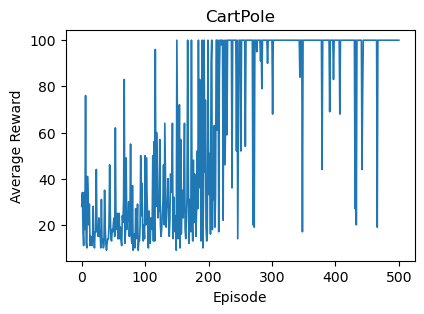

In [3]:
u.plot_reward(Path().cwd()/'results'/'logging'/'CartPole-v1_1.csv', 'CartPole')

The command below will evaluate the trained model in 10 episodes and report the average reward (and episode length) for these 10 episodes.

In [4]:
t.test(episodes=10, 
       cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
       cfg_args=dict(testing=True, seed=None, max_episode_steps=1000, use_wandb=False))

Numpy/Torch/Random Seed:  501
Loading model from /notebooks/rl2023/ex1_wandb_fix/results/model/CartPole-v1_params.pt ...
Testing...


/opt/software/lib/python3.10/site-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


Test ep reward: 137.0 seed: 88
Test ep reward: 127.0 seed: 672
Test ep reward: 131.0 seed: 680
Test ep reward: 127.0 seed: 592
Test ep reward: 135.0 seed: 481
Test ep reward: 137.0 seed: 78
Test ep reward: 147.0 seed: 735
Test ep reward: 156.0 seed: 852
Test ep reward: 132.0 seed: 694
Test ep reward: 126.0 seed: 965
Average test reward: 135.5 episode length: 1000.0


The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [5]:
# Train Result
video_dir = work_dir/'video'/'CartPole-v1'/'train'

# List all MP4 files in the directory
mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
# Display each MP4 file
for i, mp4_file in enumerate(mp4_files):
    video_path = os.path.join(video_dir, mp4_file)
    video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
    frame_color = frame_colors[i % len(frame_colors)]
    video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #FF5733;">{video._repr_html_()}</div>')
    print("test/",mp4_file)
    display(video_frame)

test/ ex1-episode-0.mp4


test/ ex1-episode-50.mp4


test/ ex1-episode-100.mp4


test/ ex1-episode-150.mp4


test/ ex1-episode-200.mp4


test/ ex1-episode-250.mp4


test/ ex1-episode-300.mp4


test/ ex1-episode-350.mp4


test/ ex1-episode-400.mp4


test/ ex1-episode-450.mp4


test/ ex1-episode-500.mp4


In [6]:
# Test Result

video_dir = work_dir/'video'/'CartPole-v1'/'test'

# List all MP4 files in the directory
mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
# Display each MP4 file
for i, mp4_file in enumerate(mp4_files):
    video_path = os.path.join(video_dir, mp4_file)
    video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
    frame_color = frame_colors[i % len(frame_colors)]
    video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #5733FF;">{video._repr_html_()}</div>')
    print("test/",mp4_file)
    display(video_frame)

test/ ex1-episode-0.mp4


test/ ex1-episode-1.mp4


test/ ex1-episode-2.mp4


test/ ex1-episode-3.mp4


test/ ex1-episode-4.mp4


test/ ex1-episode-5.mp4


test/ ex1-episode-6.mp4


test/ ex1-episode-7.mp4


test/ ex1-episode-8.mp4


test/ ex1-episode-9.mp4


<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Learning (10 points) </h3> 

Test the trained model from Task 1 five times with different random seeds. Did the same model, trained to balance for 100 timesteps, learn to always balance the pole for 1000 timesteps? Why/why not?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [7]:
episodes = 10
timesteps = 1000

for seed in [10,100,1000,10000,100000]:
    t.test(episodes=episodes, 
           cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
           cfg_args=dict(testing=True, seed=seed, max_episode_steps=timesteps, use_wandb=False, save_video = False))
    print('---------------------------------\n')

Numpy/Torch/Random Seed:  10
Loading model from /notebooks/rl2023/ex1_wandb_fix/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Test ep reward: 144.0 seed: 10
Average test reward: 144.0 episode length: 1000.0
---------------------------------

Numpy/Torch/Random Seed:  100
Loading model from /notebooks/rl2023/ex1_wandb_fix/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Test ep reward: 129.0 seed: 100
Average test reward: 1

The performance of the trained model in Task 1 when tested with different random seeds hinges on various factors inherent to reinforcement learning. If the agent has successfully learned an effective policy during training, it might be capable of balancing the pole for an extended period, possibly even reaching 1000 timesteps. However, due to the stochastic nature of the learning process and the potential variability in exploration and environmental noise, there's no guarantee that the learned policy will consistently achieve this level of performance. In above instances, the learned policy fall short, resulting in an average test reward that could be even lower than the initial benchmark of 100 timesteps. As we can see, none of them learn to always balance the pole for 1000 timesteps. This is likely due to 100 timesteps not being enough to test if the system has learned to actually stabilize the pole. Our results seem to imply that.

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Investigating Training Performance (10 points) </h3> 

Repeat the experiment in Task 1 five times, each time training the model from scratch with 100 timesteps and testing it for 1000 timesteps. Use a different seed number for each training/testing cycle. You can use the box below to write a small script to do this. Use the result textbox below to report the average test reward for each repeat. 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [8]:
episodes = 10
train_timesteps = 100
test_timesteps = 1000

for seed in [20,200,2000,20000,200000]:
    t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
        cfg_args=dict(seed=seed, max_episode_steps=train_timesteps, save_video=False))
    
    t.test(episodes=episodes, 
           cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
           cfg_args=dict(testing=True, seed=seed, max_episode_steps=test_timesteps, use_wandb = False, save_video=False))
    print('---------------------------------\n')

Numpy/Torch/Random Seed:  20
Configuration Settings: {'exp_name': 'ex1', 'seed': 20, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': False, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2

Episode 0 finished. Total reward: 24.0 (24 timesteps)
Episode 1 finished. Total reward: 19.0 (19 timesteps)
Episode 2 finished. Total reward: 16.0 (16 timesteps)
Episode 3 finished. Total reward: 21.0 (21 timesteps)
Episode 4 finished. Total reward: 13.0 (13 timesteps)
Episode 5 finished. Total reward: 14.0 (14 timesteps)
Episode 6 finished. Total reward: 35.0 (35 timesteps)
Episode 7 finished. Total reward: 18.0 (18 timesteps)
Episode 8 finished. Total reward: 22.0 (22 timesteps)
Episode 9 finished. Total reward: 19.0 (19 timesteps)
Episode 10 fi

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Analysis of Training Performance (15 points) </h3> 

Are the behavior and performance of the trained models the same every time? Why/why not? Analyze the causes briefly.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The trained models did not consistently perform the same way for the following reasons:

1. Random Initialization: When we start training a reinforcement learning agent, we initialize its parameters randomly. Each unique random seed results in a different initial set of parameters. These initial conditions significantly influence how the agent learns.

2. Exploration vs. Exploitation: Reinforcement learning involves a balance between exploring different actions to learn about the environment and exploiting the current knowledge to maximize rewards. The choice between exploration and exploitation can vary depending on the initial conditions, leading to different learning paths.

3. Stochastic Environments: Many environments in reinforcement learning have inherent randomness. Even if the agent follows the same policy, it can encounter different outcomes in different runs due to this inherent randomness.

4. Local Optima: Reinforcement learning algorithms can get stuck in local optima, which are suboptimal solutions. Different random seeds may lead the learning process to converge to different local optima, resulting in varying learned policies and test rewards.

5. Limited Training Data: Training for only 100 timesteps is relatively short in the context of reinforcement learning. This limited training data makes the learning process highly sensitive to initial conditions and random variations.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.2</b> Stochasticity (10 points) </h3> 

What are the implications of this stochasticity, when it comes to comparing reinforcement learning algorithms to each other? Please explain.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The trade-off made between exploration and exploitation can create a great variance between successive runs of the same training process. This implies that comparisons should be performed carefully: for each algorithm to be compared, either you use a long training process in order to converge to optimal policy, or you consider an average performance on multiple experiments.
For the considered algorithm, an overview of 100 independent executions can be seen in the following image. The implications of this stochasticity of the test performance depending on the set seed are that when comparing different models, one should take this into account e.g. by doing the training and testing with different seeds to get accurate estimation of the results other users might get.

# Reacher <a id='3.'></a>

Now we will focus on designing a reward function for a different environment, the Reacher environment, where a two-joint manipulator needs to reach a goal (see Figure 2).

<figure>
<img src="imgs/reacher.png" width="200px">
<figcaption style="text-align: center"> Figure 2: The Reacher environment  </figcaption>
</figure>

The Cartesian ($x$, $y$) position of the end-effector of the manipulator can be determined following the equation:

$$
 x = L_1 \sin(\theta_0)+L_2 \sin(\theta_0+\theta_1)\\
 y = -L_1 \cos(\theta_0)-L_2 \cos(\theta_0+\theta_1)
$$

where $L1 = 1$, $L2 = 1$ are the lengths, and $\theta_0$, $\theta_1$ the joint angles of the first and second links respectively. The state (and observation) in this environment is the two element vector:

$$
o=s=\left(\begin{array}{c}
\theta_0 \\
\theta_1 \\
\end{array}\right) \text {, }
$$

The action space now consists of 5 "options"; 4 correspond rotating the first/second joint left/right, and the final one performs no motion at all (the configuration doesn’t change). The episode terminates when the agent reaches the target position, marked in red. Now, let us design a custom reward function and use it for training the RL agent.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Reward Functions (20 points) </h3> 

Below two classes are shown that modify the reward function of the reacher function provided in ```reacher.py```. Edit the function ```get_reward``` _below_ (not in ```reacher.py```) in both classes. For each class, write a reward function to incentivise the agent to learn the following behaviors:

Class 1) ```SpinningReacherEnv```: Keep the manipulator rotating clockwise continuously (w.r.t. angle θ_0). You can use a lower number of training episodes for this, e.g. train(cfg_args=dict(env_name='SpinningReacher-v0', train_episodes=200), overrides=['env=reacher_v1'])

Class 2) ```TargetReacherEnv```: Reach the goal point located in x = [1.0,1.0] (marked in red). Use at least 500 training episodes.
    
Train one model for each behavior. 

**Hint:** Use the observation vector to get the quantities required to compute the new reward (such as the position of the manipulator). You can get the Cartesian position of the end-effector with ```self.get_cartesian_pos(state)```.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [9]:
from reacher import ReacherEnv
from typing import Optional
from gymnasium.envs.registration import register

class SpinningReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        # TODO: Task 3: Implement and test the first reward function
        ########## Your code starts here ##########
        prev_state_t0 = prev_state[0]
        next_state_t0 = next_state[0]
        d = prev_state_t0 - next_state_t0
        reward = -(0.2-d)**2
        return reward
        ########## Your codes end here ########## 
        
    
register("SpinningReacher-v0",
        entry_point="%s:SpinningReacherEnv"%__name__,
        max_episode_steps=200)

class TargetReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        # TODO: Task 3: Implement and test the second reward function
        ########## Your code starts here ##########
        next_state_cart = self.get_cartesian_pos(next_state)
        d = np.linalg.norm(self.goal - next_state_cart)
        return -d
        ########## Your codes end here ########## 
        
register("TargetReacher-v0",
        entry_point="%s:TargetReacherEnv"%__name__,
        max_episode_steps=200)

In [10]:
t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='SpinningReacher-v0', train_episodes=200, seed=1, use_wandb = False)) # < 5 mins

Numpy/Torch/Random Seed:  1
Configuration Settings: {'exp_name': 'ex1', 'seed': 1, 'env_name': 'SpinningReacher-v0', 'max_episode_steps': 200, 'train_episodes': 200, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': False, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 2
Action space dimensions: 5

Episode 0 finished. Total reward: -11.479998660088441 (200 timesteps)
Episode 1 finished. Total reward: -11.399995174410277 (200 timesteps)
Episode 2 finished. Total reward: -8.039997212888613 (164 timesteps)
Episode 3 finished. Total reward: -10.719998240472043 (200 timesteps)
Episode 4 finished. Total reward: -11.079998991490116 (200 timesteps)
Episode 5 finished. Total reward: -10.959999570847003 (200 timesteps)
Episode 6 finished. Total reward: -11.159995999338106 (200 timesteps)
Episode 7 finished. Total reward: -11.439996185304507 (200 

In [11]:
t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
       cfg_args=dict(env_name='SpinningReacher-v0', testing=True, use_wandb = False))

Numpy/Torch/Random Seed:  501
Loading model from /notebooks/rl2023/ex1_wandb_fix/results/model/SpinningReacher-v0_params.pt ...
Testing...
Test ep reward: -3.333960174584665e-09 seed: 88
Test ep reward: -3.336128173698253e-09 seed: 672
Test ep reward: -3.335400755572489e-09 seed: 680
Test ep reward: -3.349159705107697e-09 seed: 592
Test ep reward: -3.3402199228599512e-09 seed: 481
Test ep reward: -3.346310828417622e-09 seed: 78
Test ep reward: -3.34077712159153e-09 seed: 735
Test ep reward: -3.3245592056924718e-09 seed: 852
Test ep reward: -3.3540285659777494e-09 seed: 694
Test ep reward: -3.3354092820853193e-09 seed: 965
Average test reward: -3.3395953735587756e-09 episode length: 200.0


The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [12]:
Video(work_dir/'video'/'SpinningReacher-v0'/'test'/f'ex1-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

In [13]:
t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='TargetReacher-v0', train_episodes=500, seed=1, use_wandb = False)) # < 5 mins

Numpy/Torch/Random Seed:  1
Configuration Settings: {'exp_name': 'ex1', 'seed': 1, 'env_name': 'TargetReacher-v0', 'max_episode_steps': 200, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': False, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 2
Action space dimensions: 5

Episode 0 finished. Total reward: -614.8154649196536 (200 timesteps)
Episode 1 finished. Total reward: -575.2843890753938 (200 timesteps)
Episode 2 finished. Total reward: -457.8751851993783 (164 timesteps)
Episode 3 finished. Total reward: -600.9119718483038 (200 timesteps)
Episode 4 finished. Total reward: -559.7841669431821 (200 timesteps)
Episode 5 finished. Total reward: -558.6275674565665 (200 timesteps)
Episode 6 finished. Total reward: -506.94207067820423 (200 timesteps)
Episode 7 finished. Total reward: -505.4194116482235 (200 timestep

In [14]:
t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
       cfg_args=dict(env_name='TargetReacher-v0', seed=None, testing=True, use_wandb = False))

Numpy/Torch/Random Seed:  323
Loading model from /notebooks/rl2023/ex1_wandb_fix/results/model/TargetReacher-v0_params.pt ...
Testing...
Test ep reward: -369.84828576846047 seed: 185
Test ep reward: -368.05366271514913 seed: 231
Test ep reward: -369.53537959950086 seed: 49
Test ep reward: -370.2351179236106 seed: 301
Test ep reward: -368.30110609872247 seed: 943
Test ep reward: -369.2143199012879 seed: 741
Test ep reward: -368.4038036046815 seed: 708
Test ep reward: -371.00744755451905 seed: 195
Test ep reward: -367.99741015861116 seed: 564
Test ep reward: -367.1119375408976 seed: 827
Average test reward: -368.97084708654404 episode length: 200.0


In [15]:
Video(work_dir/'video'/'TargetReacher-v0'/'test'/f'ex1-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Visualizing Behavior (10 points) </h3> 

Now, let us visualize the reward function for the second behavior (reaching the goal [1,1]). Plot the values of the second reward function from Task 3 and the learned best action as a function of the state (the joint positions). Use the code below as a starting point. After plotting, answer the questions below.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym
from agent import Agent, Policy

In [17]:
env_name = "TargetReacher-v0" 
resolution = 101  # Resolution of the policy/reward image

# Load policy from default path to plot
policy_dir = Path().cwd()/'results'/'model'/f'{env_name}_params.pt'

sns.set()

# Create a gym environment
env = gym.make(env_name)

action_space_dim = u.get_space_dim(env.action_space)
observation_space_dim = u.get_space_dim(env.observation_space)
policy = Policy(observation_space_dim, action_space_dim)

if policy_dir:
    policy.load_state_dict(torch.load(policy_dir))
    print("Loading policy from", policy_dir)
else:
    print("Plotting a random policy")

Loading policy from /notebooks/rl2023/ex1_wandb_fix/results/model/TargetReacher-v0_params.pt


In [18]:
# Create a grid and initialize arrays to store rewards and actions
npoints = resolution
state_range = np.linspace(-np.pi, np.pi, npoints)
rewards = np.zeros((npoints, npoints))
actions = np.zeros((npoints, npoints), dtype=np.int32)

# Loop through state[0] and state[1]
for i,th1 in enumerate(state_range):
    for j,th2 in enumerate(state_range):
        # Create the state vector from th1, th2
        state = np.array([th1, th2])

        # Query the policy and find the most probable action
        with torch.no_grad():
            action_dist, _ = policy(torch.from_numpy(state).float().unsqueeze(0))
        action_probs = action_dist.probs.numpy()

        # TODO: Task 4: 1. What's the best action, according to the policy?
        # .             2. Compute the reward given state
        ########## Your code starts here ##########
        # Use the action probabilities in the action_probs vector
        # (it's a numpy array)
        best = np.argmax(action_probs)
        actions[i,j] = best
        rewards[i,j] = env.get_reward(state, best, state)
        ########## Your code ends here ##########
        
max_index = np.argmax(rewards)
row_index, col_index = np.unravel_index(max_index, rewards.shape)
print('highest reward: J1: ',state_range[row_index],' J2: ',state_range[col_index], ' reward value: ', rewards[row_index,col_index])

min_index = np.argmin(rewards)
row_index, col_index = np.unravel_index(min_index, rewards.shape)
print('lowest reward: J1: ', state_range[row_index],' J2: ',state_range[col_index], ' reward value: ', rewards[row_index,col_index])

/opt/software/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_reward` for environment variables or `env.get_wrapper_attr('get_reward')` that will search the reminding wrappers.
  logger.warn(


highest reward: J1:  -3.141592653589793  J2:  -1.5707963267948963  reward value:  -2.482534153247273e-16
lowest reward: J1:  -0.816814089933346  J2:  4.440892098500626e-16  reward value:  -3.4138047591214704


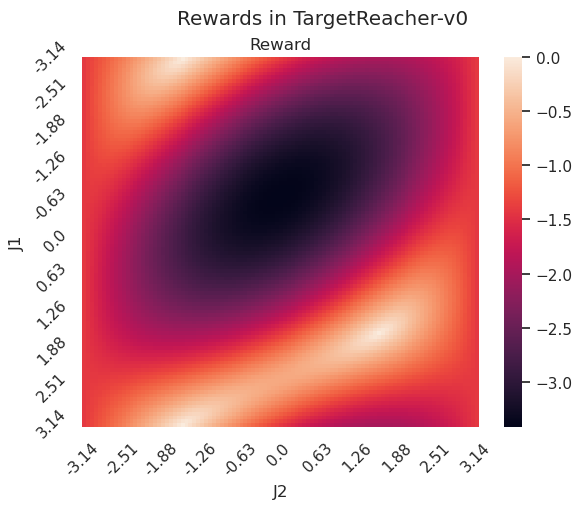

In [19]:
# Create the reward plot
num_ticks = 10
tick_skip = max(1, npoints // num_ticks)
tick_shift = 2*np.pi/npoints/2
tick_points = np.arange(npoints)[::tick_skip] + tick_shift
tick_labels = state_range.round(2)[::tick_skip]

sns.heatmap(rewards)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Reward")
plt.suptitle("Rewards in %s" % env_name)
plt.show()


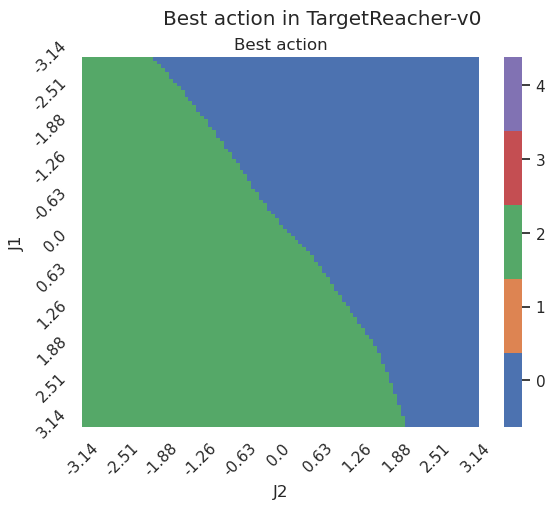

In [20]:
# # Create the policy plot
cmap = sns.color_palette("deep", action_space_dim)
sns.heatmap(actions, cmap=cmap, vmin=0, vmax=action_space_dim-1)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
colorbar = plt.gca().collections[0].colorbar
ticks = np.array(range(action_space_dim))*((action_space_dim-1)/action_space_dim)+0.5
colorbar.set_ticks(ticks)
if env.spec.id == "Reacher-v1":
    # In Reacher, we can replace 0..4 with more readable labels
    labels = ["J1+", "J1-", "J2+", "J2-", "Stop"]
else:
    labels = list(map(str, range(action_space_dim)))
colorbar.set_ticklabels(labels)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Best action")
plt.suptitle("Best action in %s" % env_name)
plt.show()

<a id='3.2.1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Achieved Performance (5 points) </h3> 

Where are the highest and lowest reward achieved?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


highest reward: J1:  -3.141592653589793  J2:  -1.5707963267948963  reward value:  -2.482534153247273e-16


lowest reward: J1:  -0.816814089933346  J2:  4.440892098500626e-16  reward value:  -3.4138047591214704



This is based on the code, I implemented to find lowest and highest rewards.

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Analysis of Behaviour (10 points) </h3> 

Did the policy learn to reach the goal from every possible state (manipulator configuration) in an optimal way (i.e. with lowest possible number of steps)? Why/why not?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Inspecting both the state reward and policy plot, we can see that optimal way to reach goal state is not always achieved (in number of steps). For example from state (J1: -3.14, J2: 0) it would be obviously much more efficient to go into -J2 direction, but policy plot indicates that the optimal action would be to +J1.. This repetitive leftward rotation is a consequence of the training process, which likely began from the same initial position during training. As a result, the robot may not have learned to adapt its actions effectively to various real-world scenarios or achieve optimal outcomes in different contexts.

This highlights the importance of diverse training data and starting positions to ensure that the robot's learned behaviors are adaptable and optimal across a range of situations, rather than being constrained by a fixed, suboptimal routine.

# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex1.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:
- Task 1, CartPole ```episodesep_reward``` plot from logged csv file
- x2 Task 4 reward plots

Ensure the correct model files are saved:
- results/model/CartPole-v1_params.pt
- results/model/SpinningReacher-v0_params.pt
- results/model/TargetReacher-v0_params.pt

## 4.1 Feedback <a id='4.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)


In [21]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [22]:
T1 = None # Student Task 1. Implementing Q-Learning (25 points)
T2 = None # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = None # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = None # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = None # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = None # Student Question 3.2 Exploration (15 points)
T4 = None # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = None # Student Question 4.1 Lunar Lander Performance (15 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)


In [23]:
T1 = None # Student Task 1. Implementing Q-Learning (25 points)
T2 = None # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = None # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = None # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = None # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = None # Student Question 3.2 Exploration (15 points)
T4 = None # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = None # Student Question 4.1 Lunar Lander Performance (15 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

Please use the following section to record references.
# References <a id='5.'></a>

[1] Sutton, Richard S., and Andrew G. Barto. "Reinforcement Learning: An Introduction (in progress)." London, England (2017). http://incompleteideas.net/book/RLbook2018.pdf